# Project allocation 

In [157]:
import numpy as np
import pandas as pd
import openpyxl as pxl
import matplotlib.pyplot as plt
%matplotlib inline 

# Supervisors in data base

In [158]:
supervisors = pd.read_excel('data/project_database_2021.xlsx', sheet_name='supervisors')
supervisors.rename(columns={'full name': 'full_name'}, inplace=True)
supervisors[supervisors.UoB == 'X']#["UoB"=="X"].head(150)

,MSc Robotics,MSc BioRobotics,MSc Aerial Robotics,UoB,UWE,username,firstname,surname,full_name,email,profile,can_be_main_supervisor,max_students
1,X,NaN,NaN,X,NaN,k-aplin,Karen,Aplin,Karen Aplin,karen.aplin@bristol.ac.uk,"My research is interdisciplinary, science-driv...",1.0,3.0
2,X,NaN,NaN,X,NaN,d-barton,David,Barton,David Barton,david.barton@bristol.ac.uk,Research interests\n- Dynamics (differential e...,1.0,1.0
6,X,X,NaN,X,NaN,a-conn,Andrew,Conn,Andrew Conn,A.Conn@bristol.ac.uk,My research revolves around the application of...,1.0,3.0
9,X,NaN,NaN,X,NaN,m-elkington,Michael,Elkington,Michael Elkington,michael.elkington@bristol.ac.uk,I work in the area of Automated Manufacturing ...,1.0,3.0
10,X,X,NaN,X,NaN,h-gadelha,Hermes,Gadelha,Hermes Gadelha,hermes.gadelha@bristol.ac.uk,The polymaths-lab is nested within the SoftLab...,1.0,2.0
13,X,X,NaN,X,NaN,s-hauert,Sabine,Hauert,Sabine Hauert,sabine.hauert@bristol.ac.uk,"We engineer swarms across scales, from nanopar...",1.0,4.0
14,X,X,NaN,X,NaN,h-hauser,Helmut,Hauser,Helmut Hauser,helmut.hauser@bristol.ac.uk,[www.morphologicalcomputation.org](http://www....,1.0,2.0
17,X,X,NaN,X,NaN,e-hunt,Edmund,Hunt,Edmund Hunt,edmund.hunt@bristol.ac.uk,My main area of research is in bioinspired rob...,1.0,3.0
21,X,NaN,NaN,X,NaN,a-khalil,Ahmed,Khalil,Ahmed Khalil,oe18433@bristol.ac.uk,My main research interests are Deep Reinforcem...,NaN,3.0
22,X,NaN,NaN,X,NaN,c-lee,Chanelle,Lee,Chanelle Lee,c.l.lee@bristol.ac.uk,NaN,1.0,3.0


# Responses to phase 1 data collection

In [159]:
cols = ['id', 's', 'T', 'mail_ID', 'name', 'full_name', 'register', 'email', 'dept', 'N_proj', 'kwords', 'prog']
resp = pd.read_excel('data/project_database_2021.xlsx', sheet_name='response_round_1', names=cols)
resp.head(6)

,id,s,T,mail_ID,name,full_name,register,email,dept,N_proj,kwords,prog
0,3,2021-10-12 22:23:23,2021-10-12 22:24:31,hp12384@bristol.ac.uk,Hemma Philamore,Hemma Philamore,Yes,hemma.philamore@gmail.com,Engineering Mathematics,3.0,"soft robotics, bio-hybrid robots",MSc Robotics;MSc BioRobotics;
1,5,2021-10-13 08:39:38,2021-10-13 08:41:22,anonymous,NaN,Helmut Hauser,Yes,helmut.hauser@bristol.ac.uk,Engineering Mathematics,3.0,"morphological computation, locomotion, soft ro...",MSc BioRobotics;MSc Robotics;
2,6,2021-10-13 09:35:01,2021-10-13 09:35:15,anonymous,NaN,Nikolai Bode,No,NaN,NaN,NaN,NaN,NaN
3,7,2021-10-13 09:13:45,2021-10-13 09:38:42,anonymous,NaN,Dandan Zhang,Yes,ye21623@bristol.ac.uk,Engineering Mathematics,5.0,Robot learning ( Machine Learning and Deep Lea...,MSc BioRobotics;MSc Robotics;
4,8,2021-10-13 10:18:46,2021-10-13 10:18:56,anonymous,NaN,Tom Hill,No,NaN,NaN,NaN,NaN,NaN
5,9,2021-10-13 10:22:07,2021-10-13 10:23:44,anonymous,NaN,Andrew Hinitt,Yes,andrew.hinitt@bristol.ac.uk,Engineering Mathematics,1.0,Soft Robotics Medical Implant Surgical,MSc Robotics;


# Re-assign programme names 

In [154]:
# Split strings of programmes, remove spaces, sort in alphabetical order, convert string to list

#print([', '.join(sorted(list(filter(lambda x: x != "", P.split(';')))))  if P != 'NaN' else P for P in resp['prog'].fillna('NaN')] )
#pr('NaN')])

resp['prog'] = [', '.join(sorted(list(filter(lambda x: x != "", P.split(';')))))  if P != float('NaN') else P for P in resp['prog'].fillna('NaN')]

resp.head(60)

,id,s,T,mail_ID,name,full_name,register,email,dept,N_proj,kwords,prog
0,3,2021-10-12 22:23:23,2021-10-12 22:24:31,hp12384@bristol.ac.uk,Hemma Philamore,Hemma Philamore,Yes,hemma.philamore@gmail.com,Engineering Mathematics,3.0,"soft robotics, bio-hybrid robots","MSc BioRobotics, MSc Robotics"
1,5,2021-10-13 08:39:38,2021-10-13 08:41:22,anonymous,NaN,Helmut Hauser,Yes,helmut.hauser@bristol.ac.uk,Engineering Mathematics,3.0,"morphological computation, locomotion, soft ro...","MSc BioRobotics, MSc Robotics"
2,6,2021-10-13 09:35:01,2021-10-13 09:35:15,anonymous,NaN,Nikolai Bode,No,NaN,NaN,NaN,NaN,NaN
3,7,2021-10-13 09:13:45,2021-10-13 09:38:42,anonymous,NaN,Dandan Zhang,Yes,ye21623@bristol.ac.uk,Engineering Mathematics,5.0,Robot learning ( Machine Learning and Deep Lea...,"MSc BioRobotics, MSc Robotics"
4,8,2021-10-13 10:18:46,2021-10-13 10:18:56,anonymous,NaN,Tom Hill,No,NaN,NaN,NaN,NaN,NaN
5,9,2021-10-13 10:22:07,2021-10-13 10:23:44,anonymous,NaN,Andrew Hinitt,Yes,andrew.hinitt@bristol.ac.uk,Engineering Mathematics,1.0,Soft Robotics Medical Implant Surgical,MSc Robotics
6,10,2021-10-13 10:31:15,2021-10-13 10:39:31,anonymous,NaN,Paul O'Dowd,Yes,paul.odowd@bristol.ac.uk,Engineering Mathematics,5.0,"swarm robotics, evolutionary robotics, evoluti...","MSc BioRobotics, MSc Robotics"
7,11,2021-10-13 10:54:42,2021-10-13 10:57:15,anonymous,NaN,Benjamin Ward-Cherrier,Yes,b.ward-cherrier@bristol.ac.uk,Engineering Mathematics,2.0,"Tactile robotics, neuromorphic processing, spi...","MSc BioRobotics, MSc Robotics"
8,12,2021-10-13 11:39:53,2021-10-13 11:50:35,anonymous,NaN,Nahian Rahman,Yes,jf20027@bristol.ac.uk,Engineering Mathematics,0.0,"Grasping, Mechanism, Kinematics, Soft robot bu...","MSc BioRobotics, MSc Robotics"
9,13,2021-10-13 12:15:31,2021-10-13 12:15:59,anonymous,NaN,Thomas Gorochowski,No,NaN,NaN,NaN,NaN,NaN


# Basic Metrics

In [150]:


all_resp = resp.full_name                                             # total responses


withdraw = resp[resp.register == 'No'].full_name                      # init primary supervisors who withdrew
#N_withdraw = resp[resp.register == 'No'].shape[0]                    # number of primary supervisors who withdrew

init = supervisors[supervisors.UoB == 'X'].full_name.append(withdraw) # init primary supervisors 

init_resp    = set(init) & set(resp.full_name) 

init_no_resp = set(init) - set(resp.full_name)

new          = set(resp.full_name) - set(init)

N_projects   = sum(resp.N_proj.dropna())

primary_confirmed = set(supervisors[supervisors.UoB == 'X'].full_name) - set(init_no_resp)

average_projects_primary = resp[resp['full_name'].isin(primary_confirmed)].N_proj.mean()




print('N primary supervisors contacted initially: ', len(init))

print('N responses (total): ', len(all_resp))

print('N responded primary supervisors: ', len(init_resp))

print()

print('N responded new (PDRAs?): ', len(new))
print(new, end='\n\n')

#print('Response rate (primary supervisors):', len(init_resp)/len(init)*100, '%')

print('N did not respond primary supervisors: ', len(init_no_resp))
print(init_no_resp, end='\n\n')

print('N primary supervisors confirmed:', len(primary_confirmed))
print(primary_confirmed, end='\n\n')

print('N primary supervisors withdrew:', len(withdraw))
print(set(withdraw), end='\n\n')




print('N total projects: ', N_projects)

print('average N projects contributed by primary supervsiors: ', round(average_projects_primary, 3))


print('N total projects (inc. UWE): ', N_projects + 60)


#print('Forecast total projects (assume unresponsive supervisors submit 3 projects each)', N_projects + 3*len(init_no_resp))

N primary supervisors contacted initially:  45
N responses (total):  57
N responded primary supervisors:  37

N responded new (PDRAs?):  16
{'James Wilson', 'Christian Romero', 'Efi Psomopoulou', 'Andrew Hinitt', 'Keren Yue', 'Qiukai Qi', 'Richard Suphapol Diteesawat', 'Elliott Scott', 'Nahian Rahman', 'Mohammad Naghavi Zadeh', 'Mickey Li', 'Hirad Goudarzi', 'Martin Garrad', 'Yuan Gao', 'Lucio Rafael Salinas', 'Johanna Benn-Blee'}

N did not respond primary supervisors:  8
{'David Barton', 'Ahmed Khalil', 'Michael Elkington', 'Steve Burrow ', 'Andrew  Calway ', 'Karen Aplin', 'Dimitra Simeonidou', 'Jonathan Rossiter'}

N primary supervisors confirmed: 18
{'Arthur Richards', 'Edmund Hunt', 'Andrew Conn', 'Dandan Zhang', 'Helmut Hauser', 'Hermes Gadelha', 'Chanelle Lee', 'Shane Windsor', 'Tom Richardson', 'Lucia Marucci', 'Sebastian East', 'Sabine Hauert', "Paul O'Dowd", 'Nathan Lepora', 'Conor Houghton', 'Benjamin Ward-Cherrier', 'Hemma Philamore', 'Walterio Mayol-Cuevas'}

N primary su

# Projects and supervisors by programme and dept.  

In [160]:
def plot_data(data, y_label, filename):
    
    """ N PROJECTS / N SUPERVISORS by dept and programme """
    
    # data = resp.groupby(['dept','prog'])['N_proj'].sum().unstack().fillna(0)

    # Reorder programmes
    data = data[sorted(list(data.columns.values), key=len, reverse=True)]

    # Create four axes 
    fig, axs = plt.subplots(2, 2)#, sharex='all', sharey='all')

    # BAR CHART: programme
    sum_P = data.sum(axis=0, skipna=True) # sum for each programme
    x_pos = np.arange(len(sum_P))         # array with the same number of positions as bars
    axs[0, 0].bar(x_pos, sum_P);
    axs[0, 0].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False) 
    axs[0, 0].set_ylabel(y_label);
    #axs[0, 0].set_title('Programme');
    axs[0, 0].set_xlabel('Programme')    
    axs[0, 0].xaxis.set_label_position('top') 

    # BAR CHART: dept
    sum_D = data.sum(axis=1, skipna=True) # sum for each dept
    x_pos = np.arange(len(sum_D))         
    axs[1, 1].barh(x_pos, sum_D[::-1])
    axs[1, 1].tick_params(axis='y',which='both', left=False, right=False,labelleft=False) 
    axs[1, 1].set_xlabel(y_label);
    #axs[1, 1].set_title('Dept');
    axs[1, 1].set_ylabel('Dept')    
    axs[1, 1].yaxis.set_label_position('right') 

    # EMPTY SUBPLOT
    axs[0, 1].axis('off')

    # COLOUR MAP: N projects by department and programme
    axs[1, 0].matshow(data, cmap='Reds')
    # Value shown in each cell
    for (i, j), z in np.ndenumerate(data):
        axs[1, 0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    # text to use as labels
    axs[1, 0].set_xticks(np.arange(data.shape[1]))
    axs[1, 0].set_xticklabels(list(data.columns.values))
    axs[1, 0].set_yticks(np.arange(data.shape[0]))
    axs[1, 0].set_yticklabels(data.index.values.tolist())

    # Set ticks on bottom
    axs[1, 0].tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)

    # Rotate and align bottom ticklabels
    plt.setp([tick.label1 for tick in axs[1, 0].xaxis.get_major_ticks()], rotation=90,
             ha="right", va="center", rotation_mode="anchor")

    fig.suptitle(y_label + 'by dept and programme ')

    plt.savefig(filename,dpi=300, bbox_inches = "tight")

    sum_P_projects = sum_P




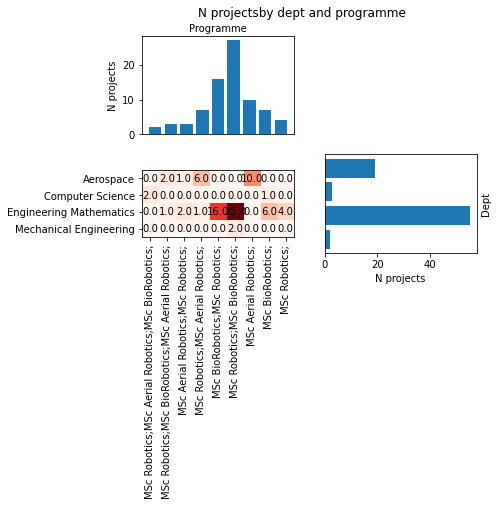

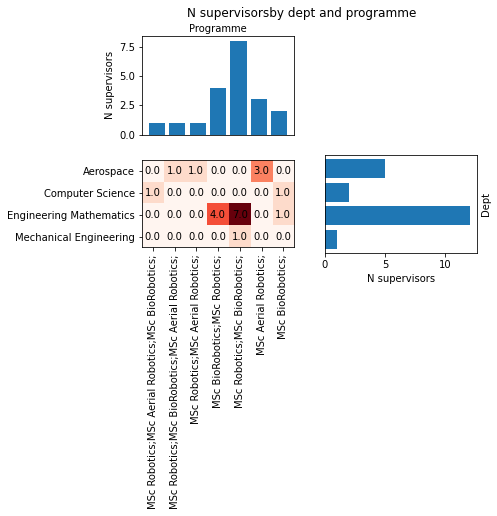

In [161]:
### N PROJECTS by dept and programme 
plot_data(resp.groupby(['dept','prog'])['N_proj'].sum().unstack().fillna(0), 
          'N projects', 
          'img/projects.png')

### N SUPERVISORS by dept and programme 
plot_data(resp[~resp['full_name'].isin(new)].groupby(['dept','prog'])['N_proj'].count().unstack().fillna(0), 
          'N supervisors', 
          'img/supervisors.png')

In [118]:
sum_P_projects

prog
MSc Aerial Robotics, MSc BioRobotics, MSc Robotics     5.0
MSc Aerial Robotics, MSc Robotics                     10.0
MSc BioRobotics, MSc Robotics                         43.0
MSc Aerial Robotics                                   10.0
MSc BioRobotics                                        7.0
MSc Robotics                                           4.0
dtype: float64

In [119]:
print(type(sum_P_projects))

sum_P = pd.concat([sum_P_projects, sum_P_supervisors], axis=1)
print(type(sum_P))
sum_P.rename(columns={0: 'projects', 1: 'primary_supervisors'}, inplace=True)
sum_P

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,projects,primary_supervisors
"MSc Aerial Robotics, MSc BioRobotics, MSc Robotics",5.0,2.0
"MSc Aerial Robotics, MSc Robotics",10.0,1.0
"MSc BioRobotics, MSc Robotics",43.0,12.0
MSc Aerial Robotics,10.0,3.0
MSc BioRobotics,7.0,2.0
MSc Robotics,4.0,NaN


In [120]:
sum_P['p:s_ratio'] = sum_P['projects'][:5] / sum_P['primary_supervisors'][:5]
sum_P

,projects,primary_supervisors,p:s_ratio
"MSc Aerial Robotics, MSc BioRobotics, MSc Robotics",5.0,2.0,2.500000
"MSc Aerial Robotics, MSc Robotics",10.0,1.0,10.000000
"MSc BioRobotics, MSc Robotics",43.0,12.0,3.583333
MSc Aerial Robotics,10.0,3.0,3.333333
MSc BioRobotics,7.0,2.0,3.500000
MSc Robotics,4.0,NaN,NaN


In [121]:
sum_P_projects_ = np.array(sum_P_projects)[:5]

sum_P_supervisors_ = np.array(sum_P_supervisors)

print(sum_P_projects_)

print(sum_P_supervisors_)

print(sum_P_projects_ / sum_P_supervisors_)

[ 5. 10. 43. 10.  7.]
[ 2.  1. 12.  3.  2.]
[ 2.5        10.          3.58333333  3.33333333  3.5       ]


# Projects 

In [123]:
projects = pd.read_excel('data/project_database_2021.xlsx', sheet_name='subjects')
projects.head()

,id,title,desc,supervisor,cosupervisor,assigned_student,is_cocreated,confirmation_email_sent,stall
0,4,Interactive expressive eyes,Gaze plays a key role in human-robot interacti...,s-lemaignan,NaN,fp20987,0.0,0,0
1,6,Socially-aware robot,The project deals with how robots can integrat...,s-lemaignan,NaN,NaN,NaN,0,1
2,8,Neuromorphic whisker tactile sensing,Develop a neuromorphic whisker sensor that can...,m-pearson,NaN,qb20314,0.0,0,0
3,9,Sign language detection for teaching applications,Design a virtual environment for teachign sign...,a-tzemanaki,NaN,NaN,0.0,0,0
4,12,Acoustic place recognition,To integrate auditory cues into a multi-sensor...,m-pearson,NaN,NaN,0.0,0,0


## Create a new sheet in the porject database to be used for the app. 

In [133]:
d = []


for p in list(primary_confirmed):                             # for each primary supervisor who responded positively
    
    ID = f'{p.split()[0][0].lower()}-{p.split()[1].lower()}'  # create an ID initial-surname e.g h-philamore
    
    if not projects[projects.supervisor==ID].empty:           # if the supervisor has previously submitted a project...
        
        for index, row in projects[projects.supervisor==ID].iterrows():  # ... create an entry for the each project

            d.append(
                {
                    'supervisor': p,
                    'second supervisor': '',
                    'email': supervisors[supervisors.full_name == p]['email'].values[0], 
                    'kwords': resp[resp.full_name == p]['kwords'].values[0], 
                    'prog': resp[resp.full_name == p]['prog'].values[0], 
                    'title': row['title'], 
                    'desc': row['desc'], 
                    'n_students': 1,
                }
            )
            
    else:                                                                # ... otherwise create an empty entry with supervisor details only       
        d.append(
            {
                'supervisor': p,
                'second supervisor': ' ',
                'email': supervisors[supervisors.full_name == p]['email'].values[0], 
                'kwords': resp[resp.full_name == p]['kwords'].values[0], 
                'prog': resp[resp.full_name == p]['prog'].values[0], 
                'title': '', 
                'desc': '', 
                'n_students': 1,
            }
        )
            
            

app_list = pd.DataFrame(d)
app_list.head()


,supervisor,second supervisor,email,kwords,prog,title,desc,n_students
0,Arthur Richards,,arthur.richards@bristol.ac.uk,Drones; Autonomy; Multi-agent,"MSc Aerial Robotics, MSc Robotics",Drone path-planning with real maps,This project will exploit readily-available ge...,1
1,Arthur Richards,,arthur.richards@bristol.ac.uk,Drones; Autonomy; Multi-agent,"MSc Aerial Robotics, MSc Robotics",The Multi-Drone Failure Inspection Test-bed,Inspection and maintenance is an important par...,1
2,Arthur Richards,,arthur.richards@bristol.ac.uk,Drones; Autonomy; Multi-agent,"MSc Aerial Robotics, MSc Robotics",Optical Drone Guidance,Major airports provide simple coloured lights ...,1
3,Arthur Richards,,arthur.richards@bristol.ac.uk,Drones; Autonomy; Multi-agent,"MSc Aerial Robotics, MSc Robotics",Traffic Patterns for Drone Ports,Air traffic control relies on standard routes ...,1
4,Arthur Richards,,arthur.richards@bristol.ac.uk,Drones; Autonomy; Multi-agent,"MSc Aerial Robotics, MSc Robotics",Intelligent automated networks for mobility,This project will investigate how and where to...,1


## Save the new sheet to the project database

In [135]:
filename = 'data/project_database_2021.xlsx'

# Properly load the workbook
excel_book = pxl.load_workbook(filename)

# Handle everything related to writing new data to the file without overwriting existing data
with pd.ExcelWriter(filename, engine='openpyxl') as writer:

    writer.book = excel_book

    # Loop through the existing worksheets in the workbook and map each title to\
    # the corresponding worksheet (that is, a dictionary where the keys are the\
    # existing worksheets' names and the values are the actual worksheets)
    writer.sheets = {worksheet.title: worksheet for worksheet in excel_book.worksheets}


    # Write the new data to the file without overwriting what already exists
    app_list.to_excel(writer, 'projects', index=False)

    # Save the file
    writer.save()


In [7]:
print(sum(resp[resp.prog=='MSc Aerial Robotics, MSc BioRobotics, MSc Robotics']['N_proj']))
resp[resp.prog=='MSc Aerial Robotics, MSc BioRobotics, MSc Robotics'][['full_name', 'N_proj']]

5.0


,full_name,N_proj
26,Sebastian East,2.0
29,Mohammad Naghavi Zadeh,1.0
49,Walterio Mayol-Cuevas,2.0


In [8]:
print(sum(resp[resp.prog=='MSc Aerial Robotics, MSc Robotics']['N_proj']))
resp[resp.prog=='MSc Aerial Robotics, MSc Robotics'][['full_name', 'N_proj']]

10.0


,full_name,N_proj
18,Lucio Rafael Salinas,1.0
20,Arthur Richards,3.0
21,Christian Romero,2.0
24,Hirad Goudarzi,1.0
27,Yuan Gao,2.0
28,Mickey Li,1.0


In [9]:
print(sum(resp[resp.prog=='MSc BioRobotics, MSc Robotics']['N_proj']))
resp[resp.prog=='MSc BioRobotics, MSc Robotics'][['full_name', 'N_proj']]

43.0


,full_name,N_proj
0,Hemma Philamore,3.0
1,Helmut Hauser,3.0
3,Dandan Zhang,5.0
6,Paul O'Dowd,5.0
7,Benjamin Ward-Cherrier,2.0
8,Nahian Rahman,0.0
12,Hermes Gadelha,2.0
14,Qiukai Qi,2.0
15,Edmund Hunt,2.0
17,James Wilson,2.0


In [10]:
print(sum(resp[resp.prog=='MSc Aerial Robotics']['N_proj']))
resp[resp.prog=='MSc Aerial Robotics'][['full_name', 'N_proj']]

10.0


,full_name,N_proj
23,Shane Windsor,5.0
45,Tom Richardson,4.0
48,Sebastian East,1.0


In [11]:
print(sum(resp[resp.prog=='MSc BioRobotics']['N_proj']))
resp[resp.prog=='MSc BioRobotics'][['full_name', 'N_proj']]

7.0


,full_name,N_proj
10,Keren Yue,2.0
13,Qiukai Qi,2.0
50,Lucia Marucci,1.0
55,Conor Houghton,1.0
56,Johanna Benn-Blee,1.0


In [12]:
print(sum(resp[resp.prog=='MSc Robotics']['N_proj']))
resp[resp.prog=='MSc Robotics'][['full_name', 'N_proj']]

4.0


,full_name,N_proj
5,Andrew Hinitt,1.0
16,Richard Suphapol Diteesawat,2.0
32,Efi Psomopoulou,1.0


In [13]:
#resp.groupby('dept').count()

In [14]:
#resp.groupby('prog').count().drop('NaN', axis=0)